In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# show the first training example
print(f"training sample:\n{train_data[0]}\n")
print(f"training label:\n{train_labels[0]}\n")

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

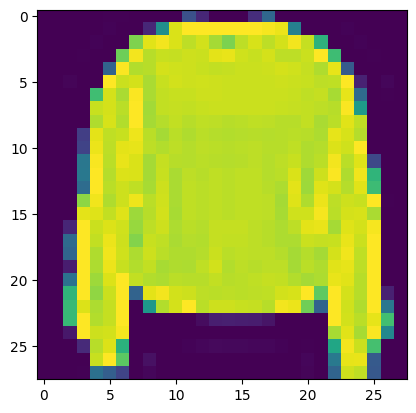

In [4]:
# plot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [5]:
# check out samples label
train_labels[7]

np.uint8(2)

In [6]:
# create a small list so we can index onto our training labels so thery're human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Dress


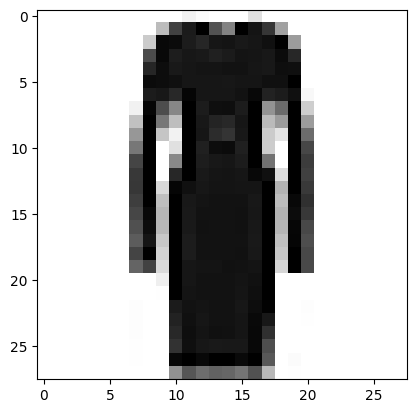

In [7]:
# plot an example image and label
index_of_choice = 2500
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
print(class_names[train_labels[index_of_choice]])


ValueError: num must be an integer with 1 <= num <= 4, not 5

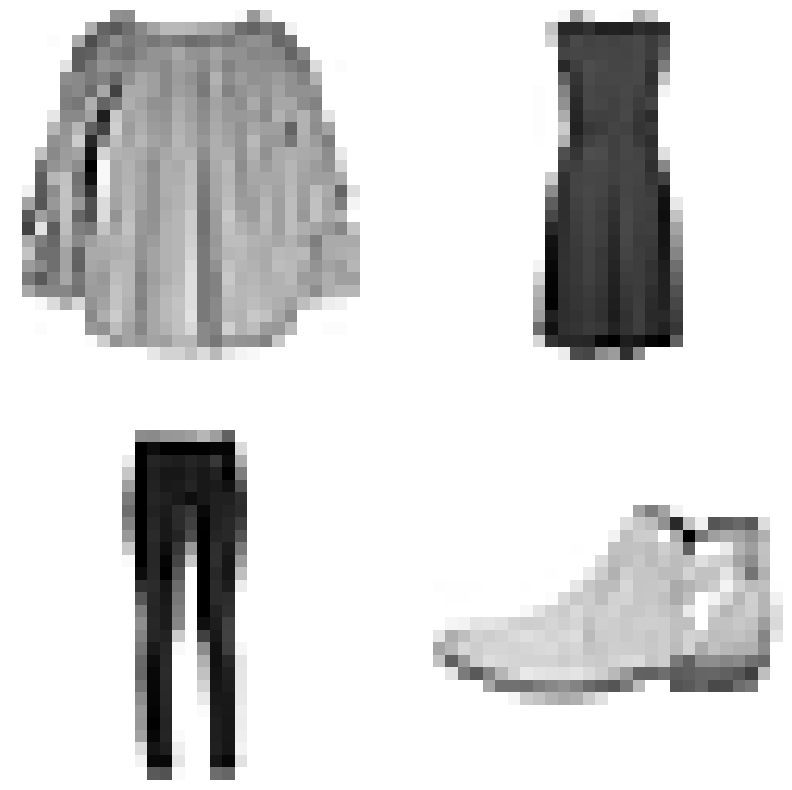

In [8]:
# plot multiple random images of fshion mnist
import random
plt.figure(figsize=(10,10))
for i in range(25):
    ax=plt.subplot(2,2,i+1)
    rand_index = random.randint(0,len(train_data))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[rand_index]])
    plt.axis(False)

building a multiclass classification  model:
input shape, output shape, loss function, output layer activation

In [9]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [10]:
train_data[0].shape

(28, 28)

In [11]:
train_labels[:10].shape

(10,)

In [12]:
tf.one_hot(train_labels[:10], depth = 10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [13]:
tf.random.set_seed(42)

m11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation =tf.keras.activations.softmax)
])

m11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'])

non_norm_history = m11.fit(train_data,
                          tf.one_hot(train_labels,depth=10),
                           epochs = 10,
                          validation_data = (test_data, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1037 - loss: 2.4752 - val_accuracy: 0.1919 - val_loss: 2.0979
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2334 - loss: 1.9739 - val_accuracy: 0.2696 - val_loss: 1.7067
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3070 - loss: 1.6628 - val_accuracy: 0.3280 - val_loss: 1.5804
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3477 - loss: 1.5622 - val_accuracy: 0.3422 - val_loss: 1.5424
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3529 - loss: 1.5311 - val_accuracy: 0.3443 - val_loss: 1.5347
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3526 - loss: 1.5173 - val_accuracy: 0.3431 - val_loss: 1.5119
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3605 - loss: 1.5045 - val_accuracy: 0.3419 - val_loss: 1.5177
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3617 - loss: 1.4989 - 

In [14]:
m11.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [15]:
# check the min and max value
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [16]:
# get our training and testing data betweem 0 and 1 by div by the max
train_data_norm = train_data / train_data.max() #train_data/255.0
test_data_norm = test_data / test_data.max()

train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [17]:
tf.random.set_seed(42)

m12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation =tf.keras.activations.softmax)
])

m12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'])

norm_history = m12.fit(train_data_norm,
                          train_labels,
                           epochs = 10,
                          validation_data = (test_data_norm, test_labels,))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3491 - loss: 1.6943 - val_accuracy: 0.5694 - val_loss: 1.0488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5826 - loss: 1.0034 - val_accuracy: 0.6750 - val_loss: 0.9089
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6739 - loss: 0.8783 - val_accuracy: 0.7037 - val_loss: 0.8237
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7094 - loss: 0.8031 - val_accuracy: 0.7208 - val_loss: 0.7849
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7216 - loss: 0.7660 - val_accuracy: 0.7243 - val_loss: 0.7668
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7327 - loss: 0.7469 - val_accuracy: 0.7298 - val_loss: 0.7554
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7396 - loss: 0.7326 - val_accuracy: 0.7372 - val_loss: 0.7421
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7470 - loss: 0.7145 - 

<Axes: title={'center': 'normalized data'}>

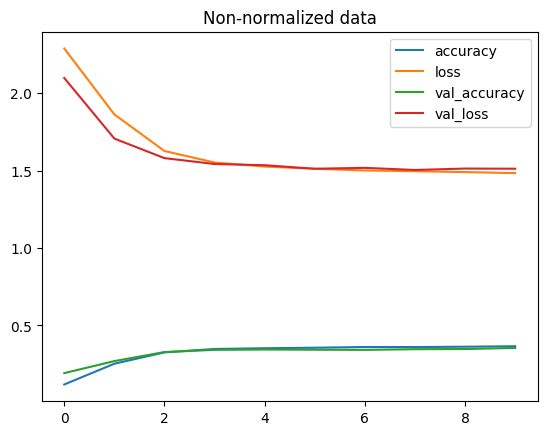

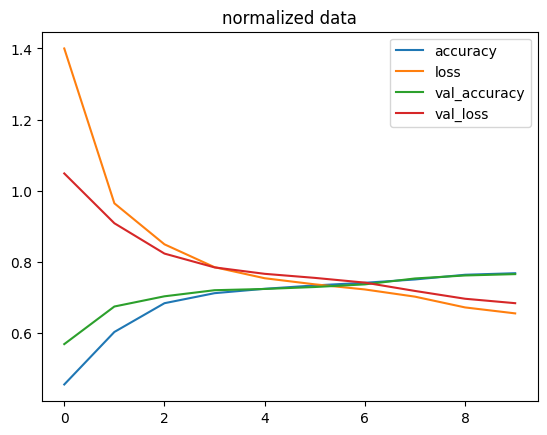

In [18]:
import pandas as pd

# plot non_normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="normalized data")


Finding the learning rate

In [19]:
import tensorflow as tf

In [20]:
tf.random.set_seed(42)

m13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation ="softmax")
])

m13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'])

# create the learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
find_lr_history = m13.fit(train_data_norm,
                          train_labels,
                           epochs = 40,
                          validation_data = (test_data_norm, test_labels),
                          callbacks = [lr_scheduler])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3087 - loss: 2.0561 - val_accuracy: 0.4301 - val_loss: 1.6499 - learning_rate: 1.0000e-04
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4775 - loss: 1.5588 - val_accuracy: 0.5272 - val_loss: 1.3780 - learning_rate: 1.1220e-04
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5543 - loss: 1.3187 - val_accuracy: 0.5981 - val_loss: 1.1880 - learning_rate: 1.2589e-04
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6189 - loss: 1.1359 - val_accuracy: 0.6350 - val_loss: 1.0460 - learning_rate: 1.4125e-04
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6589 - loss: 1.0115 - val_accuracy: 0.6710 - val_loss: 0.9617 - learning_rate: 1.5849e-04
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6946 - loss: 0.9318 - val_accuracy: 0.7058 - val_loss: 0.8979 - learning_rate: 1.7783e-04
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/ste

Text(0.5, 1.0, 'Finding the learning rate')

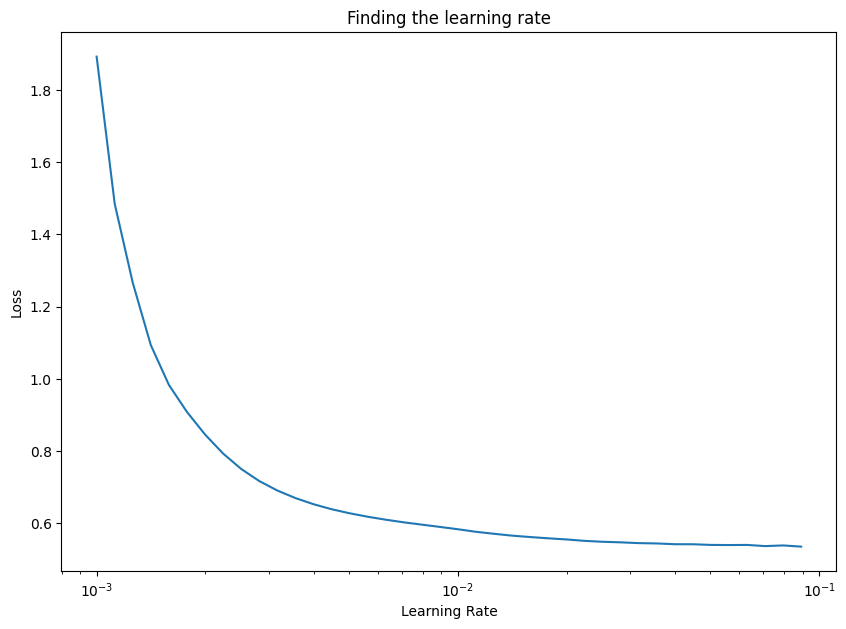

In [21]:
# plot the learning rate
import numpy as np
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the learning rate")

In [22]:
tf.random.set_seed(42)

m14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation ="softmax")
])

m14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
            metrics = ['accuracy'])

# fit the model
history = m14.fit(train_data_norm,
                          train_labels,
                           epochs = 20,
                          validation_data = (test_data_norm, test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3570 - loss: 1.7324 - val_accuracy: 0.6056 - val_loss: 1.0807
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6441 - loss: 0.9783 - val_accuracy: 0.6910 - val_loss: 0.8368
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7039 - loss: 0.7999 - val_accuracy: 0.7106 - val_loss: 0.7655
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7190 - loss: 0.7383 - val_accuracy: 0.7227 - val_loss: 0.7295
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7315 - loss: 0.7011 - val_accuracy: 0.7309 - val_loss: 0.7070
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7440 - loss: 0.6765 - val_accuracy: 0.7587 - val_loss: 0.6855
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7726 - loss: 0.6482 - val_accuracy: 0.7865 - val_loss: 0.6428
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7989 - loss: 0.6063 - 

Evaluating our multi-class classification model

In [23]:
# make confusion matrix prettier
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15, norm=False, savefig=False):
  # create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

# create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

# create classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

# label the axes
  ax.set(title = "confusion_matrix",
       xlabel = "predicted label",
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

# adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

# set threshold for different colors
  threshold = (cm.max()+ cm.min()) / 2

# plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment = "center",
             color = "white" if cm[i,j] > threshold else "black",
             size = text_size)

In [24]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
y_probs = m14.predict(test_data)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.9595456e-18, 9.9999994e-01, 8.4575857e-10, 4.0825496e-10,
        5.8412845e-13, 0.0000000e+00, 6.4148627e-19, 0.0000000e+00,
        7.6968472e-35, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [26]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
test_data[:10], test_data_norm[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [28]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.9595456e-18, 9.9999994e-01, 8.4575857e-10, 4.0825496e-10,
        5.8412845e-13, 0.0000000e+00, 6.4148627e-19, 0.0000000e+00,
        7.6968472e-35, 0.0000000e+00], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'Trouser')

In [29]:
# convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([1, 2, 1, 1, 6, 1, 4, 4, 8, 1])

In [30]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred=y_preds)

array([[702,  26, 131,   2,  10,   0, 114,   0,  15,   0],
       [  0, 985,  11,   0,   1,   0,   1,   0,   2,   0],
       [  9,  42, 850,   1,  75,   0,  16,   0,   7,   0],
       [ 57, 660, 136, 107,  18,   0,  11,   0,  10,   1],
       [  0,  52, 367,   0, 561,   0,   8,   0,  12,   0],
       [  7, 175,   5,   0,  44,   6,   1,   0, 554, 208],
       [109,  24, 376,   1, 219,   0, 246,   0,  25,   0],
       [  0, 515,  65,   0, 340,   0,   0,   0,  78,   2],
       [ 12,   7,  11,   0,  15,   0,  29,   0, 925,   1],
       [  0, 977,   2,   0,   1,   0,   0,   0,   1,  19]])

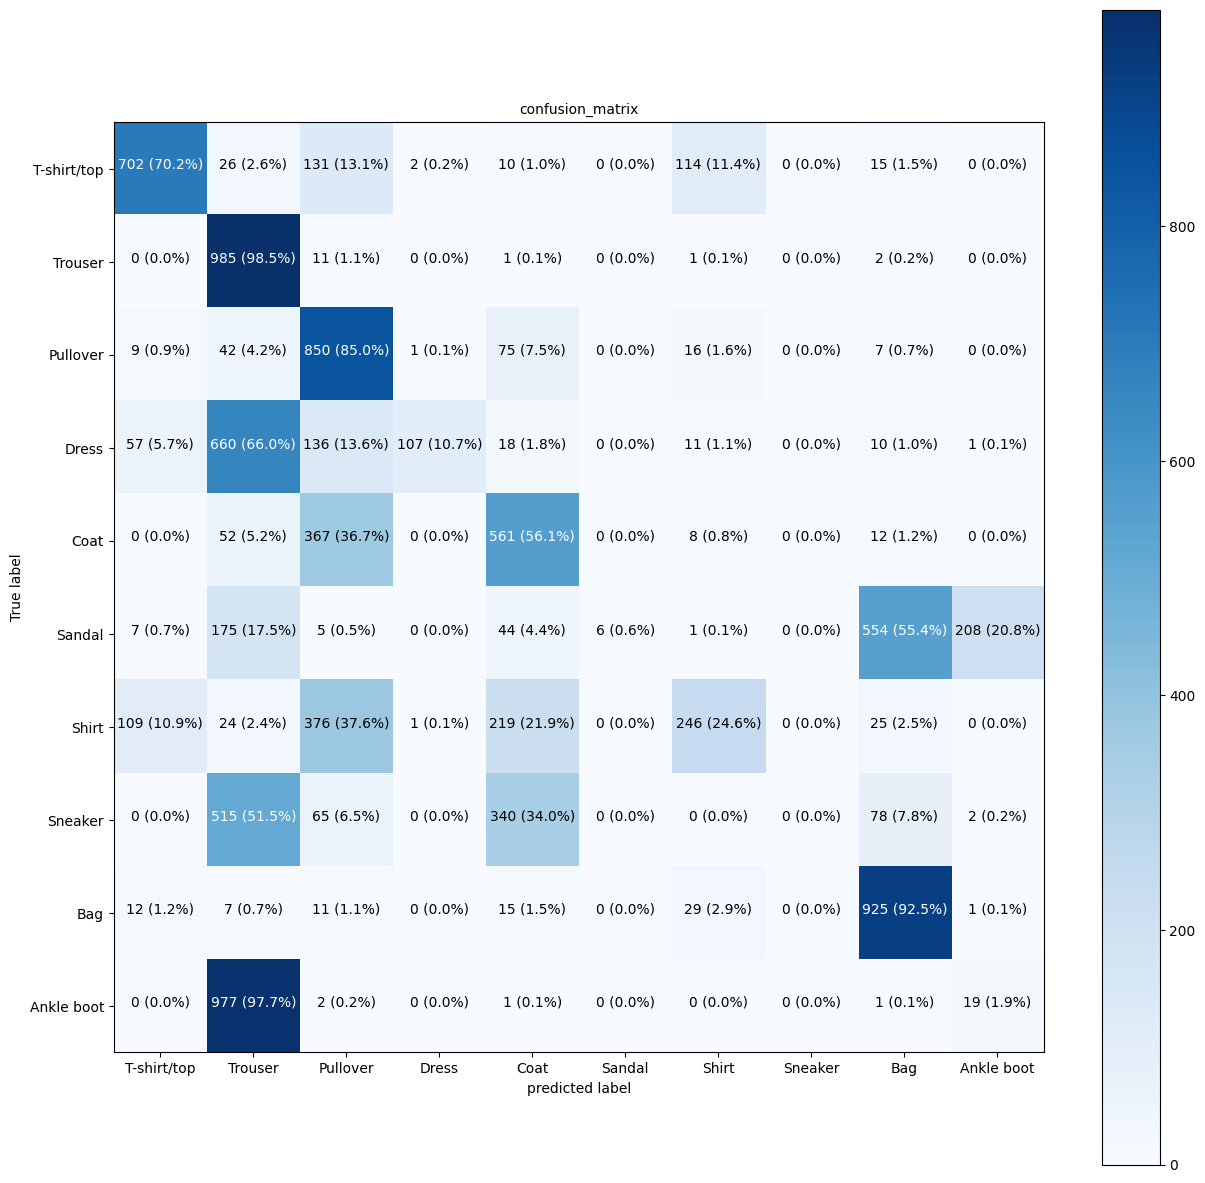

In [32]:
# make a prediction confusion matrix
make_confusion_matrix(y_true = test_labels,
                         y_pred = y_preds,
                         classes=class_names,
                         figsize=(15,15), text_size=10)

In [40]:
import random

def plot_random_image(model, images, true_labels, classes):

  # set up random int
  i = random.randint(0, len(images))
  # create prediction and targets
  target_image = images[i]
  Pred_probs = model.predict(target_image.reshape(1,28,28))
  Pred_label = classes[Pred_probs.argmax()]
  True_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the titles
  if Pred_label == True_label:
    color = "green"
  else:
    color = "red"

  # add xlabel information
  plt.xlabel("Pred: {} {:2.0f}%, True: {})".format(Pred_label,
                                                      100*tf.reduce_max(Pred_probs),
                                                      True_label, color=color))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


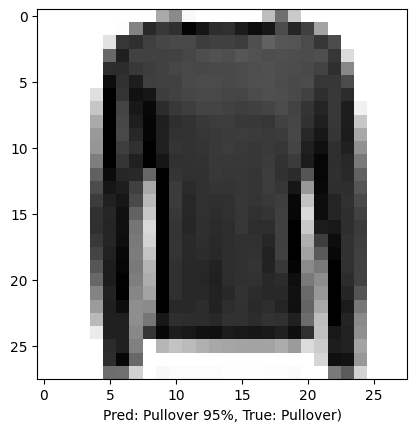

In [42]:
plot_random_image(m14,
                  images = test_data_norm,
                  true_labels =test_labels,
                  classes = class_names)

patterns is our model learning

In [43]:
m14.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [45]:
m14.layers[0]

<Flatten name=flatten_4, built=True>

In [46]:
# get the patterens of a layer in our network
weights, biases = m14.layers[1].get_weights()
weights, weights.shape

(array([[-0.32529825, -0.5371063 ,  0.86837864,  0.5080188 ],
        [-0.51623684,  0.32424492,  1.4047524 ,  0.27759293],
        [-0.74988943, -0.11017346,  0.72789   ,  0.47594765],
        ...,
        [-0.44278756,  0.05151596,  0.36014548, -0.6054759 ],
        [-0.06761917,  0.08042736, -0.14370552, -0.1502604 ],
        [-0.59069043, -0.02625421,  0.4926702 , -0.18541142]],
       dtype=float32),
 (784, 4))

In [47]:
m14.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [48]:
biases, biases.shape

(array([ 1.5994579 , -0.29104093,  1.953108  ,  0.43491453], dtype=float32),
 (4,))

every pair of neuron has a biase vector. each of this paired with a weight matrix.
the bias vector get initialized as zeros.

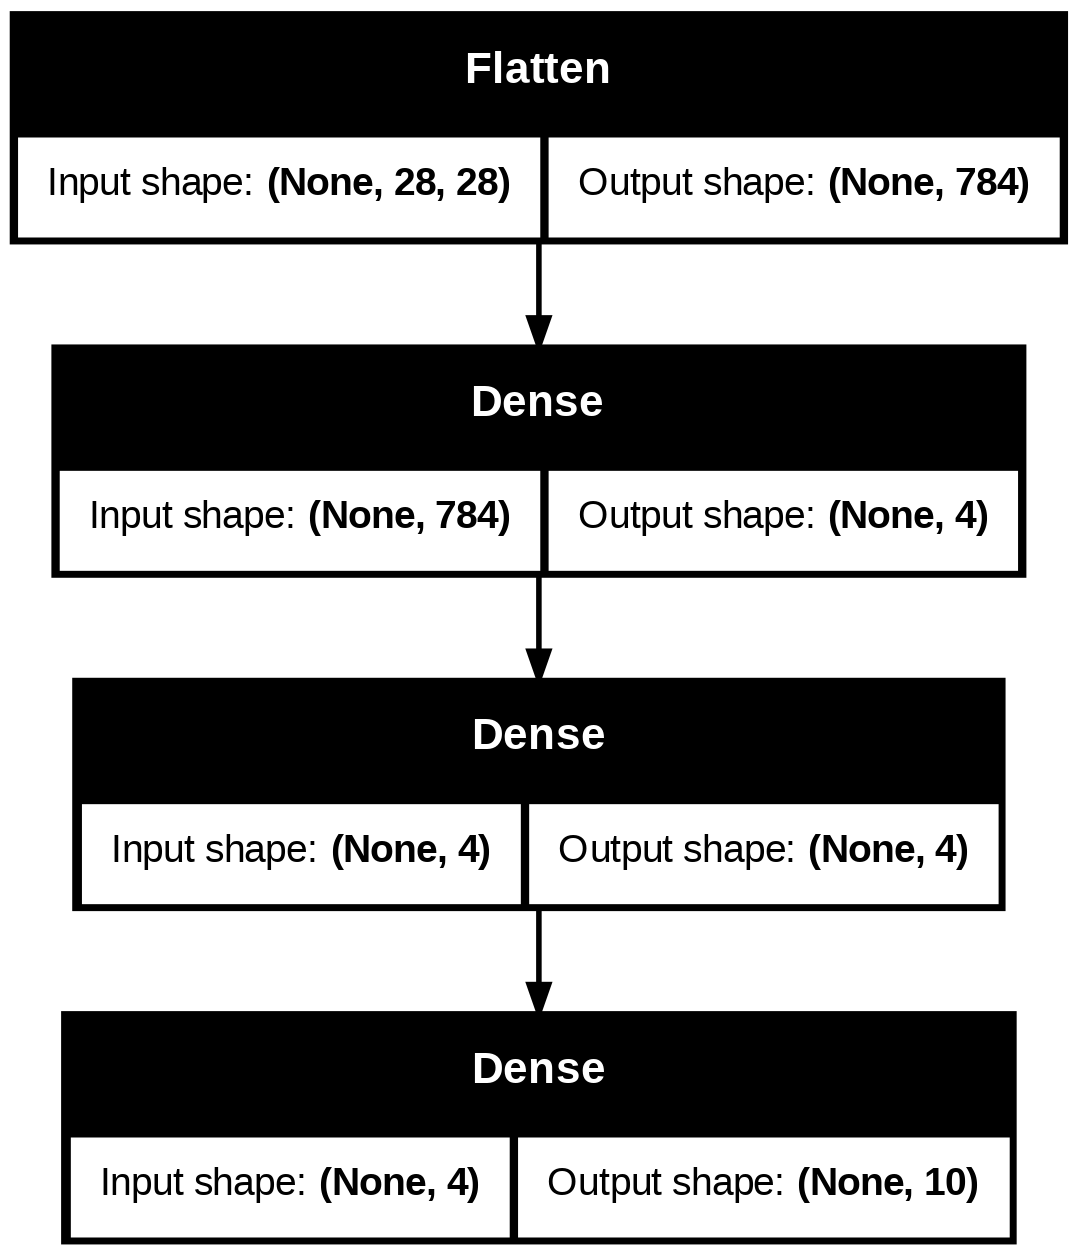

In [51]:
from tensorflow.keras.utils import  plot_model
plot_model(m14, show_shapes=True)